In [1]:
import numpy as np
import scipy as sp
import json
from PIL import Image #pip install Pillow
from matplotlib import pyplot as plt
#from scipy.misc import imread



In [1]:
import cv2
def read_video(video_path,duration=30): #limit to 1min video
    cap = cv2.VideoCapture(video_path)
    frames = []  # initalising empty frames
    fps = cap.get(cv2.CAP_PROP_FPS) # Get the frame rate (FPS) of the video
    
    frame_limit = int(fps * duration)
    frame_count = 0
    while frame_count < frame_limit:
        ret, frame = cap.read()
        if not ret:  # If the video ends before 1 minute
            break
        frames.append(frame)
        frame_count += 1
    cap.release()
    return frames 


def save_video(output_video_frames, output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Using the XVID codec

    if output_video_frames and hasattr(output_video_frames[0], 'shape'):
        frame_height, frame_width = output_video_frames[0].shape[:2]  # Get frame size
        out = cv2.VideoWriter(output_video_path, fourcc, 24, (frame_width, frame_height))
    else:
        raise ValueError("output_video_frames is either empty or the frames do not have a 'shape' attribute.")

    for frame in output_video_frames:
        out.write(frame)  # Write each frame to the output video

    out.release()

In [9]:
def detect_digits_and_draw_boxes(frames):
    processed_frames = []
    
    for frame in frames:
        # Convert frame to HSV color space
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Define the range for detecting orange color
        lower_orange = np.array([10, 100, 100])
        upper_orange = np.array([25, 255, 255])
        
        # Create a mask for orange color
        orange_mask = cv2.inRange(hsv_frame, lower_orange, upper_orange)
        orange_regions = cv2.bitwise_and(frame, frame, mask=orange_mask)
        
        # Convert the orange regions to grayscale
        gray_orange_only = cv2.cvtColor(orange_regions, cv2.COLOR_BGR2GRAY)
        
        # Apply thresholding to detect digits
        _, thresh = cv2.threshold(gray_orange_only, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Find contours in the thresholded image
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Draw bounding boxes around detected contours (likely digits)
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            if h > 15 and w > 5:  # Filter based on size to focus on digits
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green box
        
        # Add the processed frame to the list
        processed_frames.append(frame)
    
    return processed_frames


def process_video(input_video_path, output_video_path):
    frames = read_video(input_video_path)
    processed_frames = detect_digits_and_draw_boxes(frames)
    save_video(processed_frames, output_video_path)



In [ ]:
def detect_digits_and_draw_boxes(frames):
    processed_frames = []
    
    for frame in frames:
        # Convert frame to HSV color space
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Define the range for detecting orange color
        lower_orange = np.array([10, 100, 100])
        upper_orange = np.array([25, 255, 255])
        
        # Create a mask for orange color
        orange_mask = cv2.inRange(hsv_frame, lower_orange, upper_orange)
        orange_regions = cv2.bitwise_and(frame, frame, mask=orange_mask)
        
        # Convert the orange regions to grayscale
        gray_orange_only = cv2.cvtColor(orange_regions, cv2.COLOR_BGR2GRAY)
        
        # Apply thresholding to detect digits
        _, thresh = cv2.threshold(gray_orange_only, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Find contours in the thresholded image
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Draw bounding boxes around detected contours (likely digits)
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            if h > 15 and w > 5:  # Filter based on size to focus on digits
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green box
        
        # Add the processed frame to the list
        processed_frames.append(frame)
    
    return processed_frames


def process_video(input_video_path, output_video_path):
    frames = read_video(input_video_path)
    processed_frames = detect_digits_and_draw_boxes(frames)
    save_video(processed_frames, output_video_path)



In [8]:
input_video_path = 'input_video/sample1.mp4' 
output_video_path = 'output_video/output_video_with_boxes.avi'

process_video(input_video_path, output_video_path)

(-0.5, 1279.5, 719.5, -0.5)

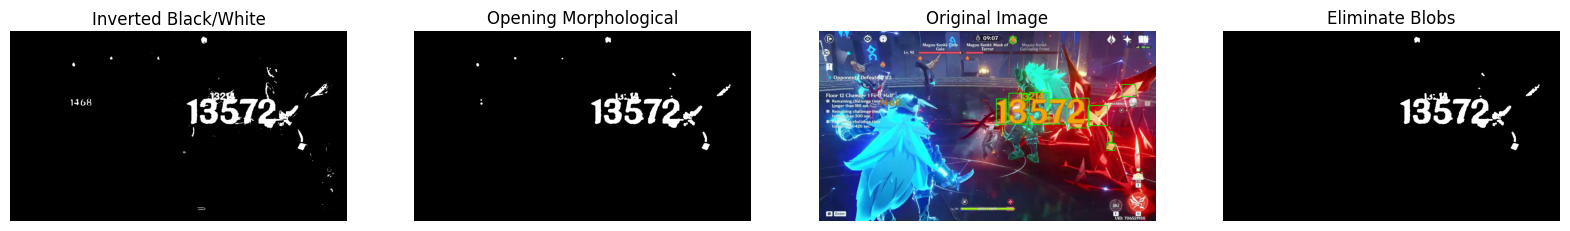

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = 'img/test/frame56.jpg'  # 'img/train/frame56.jpg' 'img/test/frame56.jpg' 'img/test/frame29.jpg'
image = cv2.imread(image_path)

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_orange = np.array([10, 100, 100])  # Start of orange hue
upper_orange = np.array([25, 255, 255])  # End of orange hue

orange_mask = cv2.inRange(hsv_image, lower_orange, upper_orange)
orange_only = cv2.bitwise_and(image, image, mask=orange_mask)

gray_orange_only = cv2.cvtColor(orange_only, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray_orange_only, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)


fig, axes = plt.subplots(1, 4, figsize=(20, 5))

#=======================================================================================================================
# Invert the black and white (now digits will be black on white background)
inverted_thresh = cv2.bitwise_not(thresh)

axes[0].imshow(inverted_thresh, cmap='gray')
axes[0].set_title("Inverted Black/White")
axes[0].axis('off')  # Hide axes for a cleaner view

    
# plt.imshow(inverted_thresh, cmap='gray')
# plt.axis('off') 
# plt.title("inverted_thresh Black/White")
# plt.show()


#=======================================================================================================================
# apply an "opening" morphological operation to disconnect components
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
opening = cv2.morphologyEx(inverted_thresh, cv2.MORPH_OPEN, kernel)

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# opening = cv2.morphologyEx(inverted_thresh, cv2.MORPH_OPEN, kernel)


axes[1].imshow(opening, cmap='gray')
axes[1].set_title("Opening Morphological")
axes[1].axis('off')


# plt.imshow(opening, cmap='gray')
# plt.axis('off') 
# plt.title("Opening mophological")
# plt.show()



#=======================================================================================================================
# Detect contours in the thresholded image (to focus on digit areas)
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

chars=[]
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if h > 15 and w > 5: 
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        chars.append(contour)

axes[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[2].set_title("Original Image")
axes[2].axis('off')


# # Perform distance transform
# dist = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# dist = cv2.normalize(dist, None, 0, 1.0, cv2.NORM_MINMAX)

# # Detect contours
# contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# chars = []
# min_distance = 1  # Minimum allowed distance between contours

# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     if h > 15 and w > 5:  # Filter small non-digit regions
        
#         # Compute the centroid of the bounding box
#         cx = x + w // 2
#         cy = y + h // 2
        
#         # Check the distance from this contour to the nearest zero pixel
#         distance = dist[cy, cx]
        
#         if distance >= min_distance:
#             # Draw rectangle only for valid digits (based on distance)
#             cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
#             chars.append(contour)

# axes[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# axes[2].set_title("Original Image")
# axes[2].axis('off')

#=======================================================================================================================
# compute the convex hull of the characters
if len(chars) > 0:
    chars = np.vstack([chars[i] for i in range(0, len(chars))])
    hull = cv2.convexHull(chars)
    # allocate memory for the convex hull mask, draw the convex hull on
    # the image, and then enlarge it via a dilation
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [hull], -1, 255, -1)
    mask = cv2.dilate(mask, None, iterations=2)

    # take the bitwise of the opening image and the mask to reveal *just*
    # the characters in the image
    final = cv2.bitwise_and(opening, opening, mask=mask)


axes[3].imshow(final, cmap='gray')
axes[3].set_title("Eliminate Blobs")
axes[3].axis('off')
# plt.imshow(final, cmap='gray')
# plt.axis('off') 
# plt.title("Eliminate blobs")
# plt.show()

